<a href="https://colab.research.google.com/github/YashPatel1604/AI-workshop-UTD/blob/main/NueralNetworks(0_9_NumberDetection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

In [12]:
 X = np.load('X.npy')
 Y = np.load('y.npy')

In [13]:
Y = to_categorical(Y)
print(Y.shape)

(5000, 10)


In [14]:
X = minmax_scale(X)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [23]:
model = keras.Sequential()

for i in range(8):
  model.add(Dense(32,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9869
Epoch 2/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9829
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9784
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9896
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0516 - accuracy: 0.9821
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9864
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9840
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9819
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9851
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.1012 - accura

In [35]:
print(model.metrics_names)

['loss', 'accuracy']


In [36]:
model.evaluate(X_test,Y_test)

40/40 [==============================] - 0s 2ms/step - loss: 0.9090 - accuracy: 0.9304


[0.9090133905410767, 0.930400013923645]

7


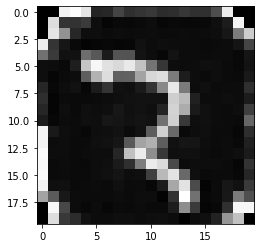

In [37]:
original_Y = np.load('y.npy')
X = X.reshape(X.shape[0],20,20)
n = 3

for i in range(len(original_Y)):
  if original_Y[i][0] == n and np.argmax(model.predict(np.array([X[i].reshape(400)]))[0]) != original_Y[i]:
    print(np.argmax(model.predict(np.array([X[i].reshape(400)]))[0]))
    plt.imshow(X[i].transpose(), cmap='gray')
    break